# Raman Nath Experiment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.optimize import curve_fit
from numpy import polyfit

In [2]:
def maxfinder(x_array, y_array):
    for i in range(len(y_array)):
        if y_array[i] == y_array.max():
            return x_array[i], y_array[i]

In [3]:
df = pd.read_excel('RN.xlsx', sheet_name='plot1')
display(df)

,Temperature,Velocity
0,79.6,1590.166667
1,78.3,1622.000000
2,76.2,1622.000000
3,75.0,1556.875000
4,74.6,1622.000000
5,73.2,1588.208333
6,72.3,1554.416667
7,72.2,1556.875000
8,70.3,1588.208333
9,69.4,1576.000000


In [4]:
temp = df['Temperature'].to_numpy()
vel = df['Velocity'].to_numpy()
# delelt = [2,3,5,6,7,9,12,13,16,17]
# delelt = [2,3,5,6,7,9,13,16,17]
delelt = [2,3,5,6,7,13,16,17]
temp1 = np.delete(temp, delelt)
vel1 = np.delete(vel, delelt)
# plt.plot(temp, vel, 'o', label='data taken')
# plt.plot(temp1, vel1, 'o', label='data selected')
# plt.xlabel('Temperature')
# plt.ylabel('Velocity')
# plt.legend()
# plt.grid()
# plt.show()

## Fitting and Plots

parameters: [-5.93721296e-04  1.96886969e-01 -2.60178372e+01  1.71261315e+03
 -5.61510720e+04  7.35083396e+05]


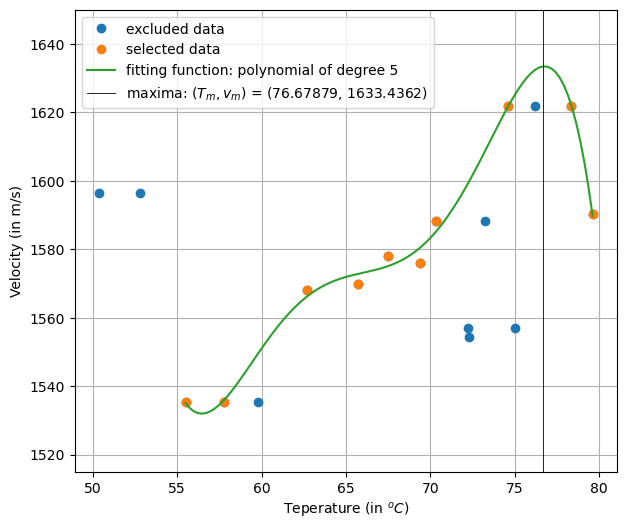

In [5]:
pfit = polyfit(temp1, vel1, 5)
dg = pfit.size - 1
print(f'parameters: {pfit}')
vfn = lambda T: sum([pfit[i]*T**(dg-i) for i in range(dg+1)])
temp2 = np.linspace(temp1.min(), temp1.max(), 100)
vel2 = vfn(temp2)
Tm, vm = maxfinder(temp2, vel2)
plt.figure(figsize=(7,6))
plt.plot(temp, vel, 'o', label='excluded data')
plt.plot(temp1, vel1, 'o', label='selected data')
plt.plot(temp2, vel2, label=f'fitting function: polynomial of degree {dg}')
plt.axvline(Tm, color='black', lw=0.6, label=f'maxima: $(T_m, v_m)$ = ({Tm:.5f}, {vm:.4f})')
plt.xlabel('Teperature (in $^oC$)')
plt.ylabel('Velocity (in m/s)')
plt.ylim(1515, 1650)
plt.legend(loc='best')
plt.grid()
plt.savefig('vel_temp_fit', dpi=300)
plt.show()